In [1]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.model_selection import GridSearchCV
from keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
type(x_test)

numpy.ndarray

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train =  x_train.reshape(60000,-1)

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_test = x_test.reshape(10000, -1)

In [9]:
x_test.shape

(10000, 784)

In [10]:
x_train = StandardScaler().fit_transform(x_train)    # standardise the data
x_test = StandardScaler().fit_transform(x_test)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.85, test_size = 0.15)

In [12]:
def cross_entropy_loss(y_prob, y):     #cross-entropy
  loss = 0

  for i in range(len(y_prob)):

    p = y_prob[i][y[i]]
    loss += -1*mt.log(p)
    # if y_prob[i] != y[i]:
    #   loss += 1

  return loss/len(y_prob)

# **part a)**

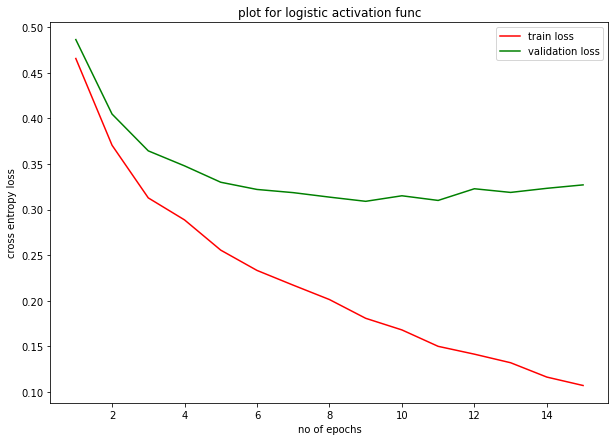

accuracy on test data ->  0.8848
avg loss on training set :  0.22270076413813877
avg loss on validation set :  0.34093655639061426



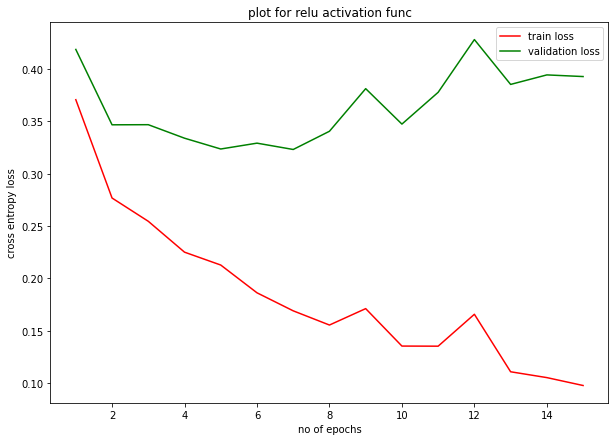

accuracy on test data ->  0.8803
avg loss on training set :  0.18472980031287972
avg loss on validation set :  0.3645754409800224



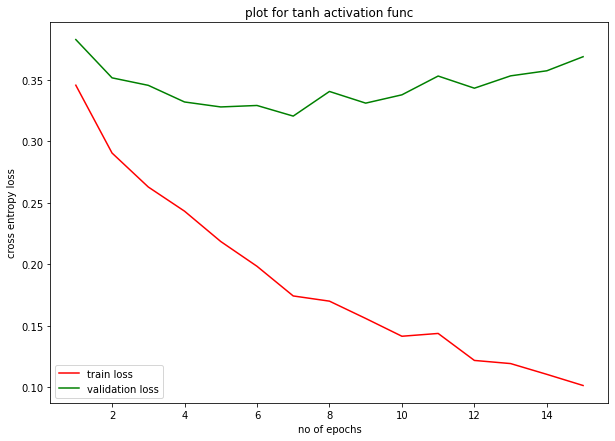

accuracy on test data ->  0.8814
avg loss on training set :  0.1865843944059124
avg loss on validation set :  0.34491555068420665



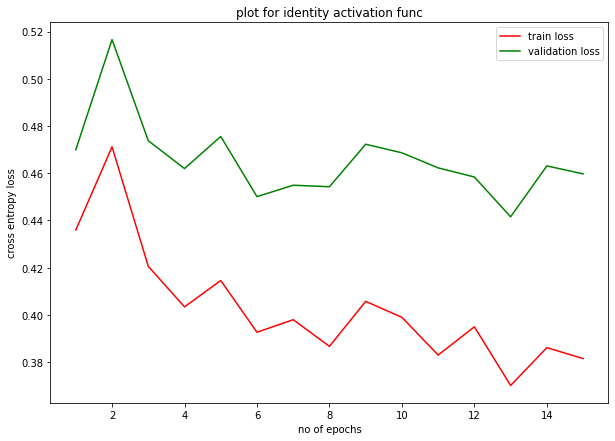

accuracy on test data ->  0.8331
avg loss on training set :  0.4028697379889535
avg loss on validation set :  0.4655302883909258



In [13]:
Activation_fun = ['logistic', 'relu', 'tanh', 'identity']

for act_fun in Activation_fun:

  MLP = MLPClassifier( hidden_layer_sizes=(256, 32), activation= act_fun, batch_size = 100)
  train_loss = []
  val_loss = []
  epochs = []

  for i in range(15):
    epochs.append(i+1)
    MLP.partial_fit(x_train, y_train, classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    y_pred = MLP.predict_proba(x_train)     # train loss
    loss = cross_entropy_loss(y_pred, y_train)
    train_loss.append(loss)

    y_pred = MLP.predict_proba(x_val)      # val loss
    loss = cross_entropy_loss(y_pred, y_val)
    val_loss.append(loss)

  plt.figure(figsize=(10, 7))
  plt.plot( epochs, train_loss, color = 'r', label = 'train loss')
  plt.plot( epochs, val_loss, color = 'g', label = 'validation loss')
  plt.xlabel('no of epochs')
  plt.ylabel('cross entropy loss')
  plt.title( 'plot for ' + act_fun + ' activation func')
  plt.legend()
  plt.show()

  y_pred = MLP.predict(x_test)
  print( 'accuracy on test data -> ', accuracy_score(y_pred, y_test))
  print('avg loss on training set : ', mean(train_loss))
  print('avg loss on validation set : ', mean(val_loss))
  print()


# **part b)**

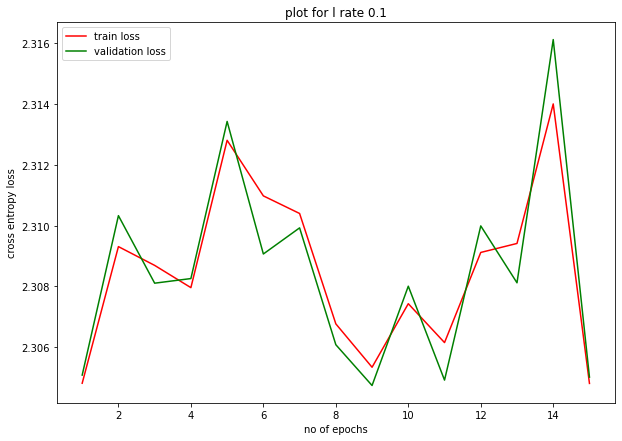

accuracy on test data ->  0.1
avg loss on training set :  2.3085337423727443
avg loss on validation set :  2.3084799621144585


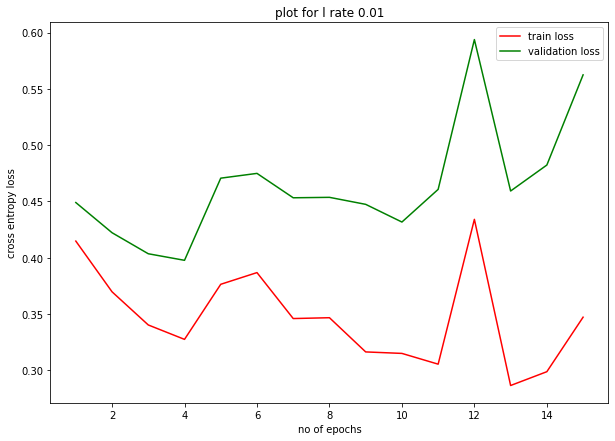

accuracy on test data ->  0.8509
avg loss on training set :  0.34729997555599595
avg loss on validation set :  0.464074616778688


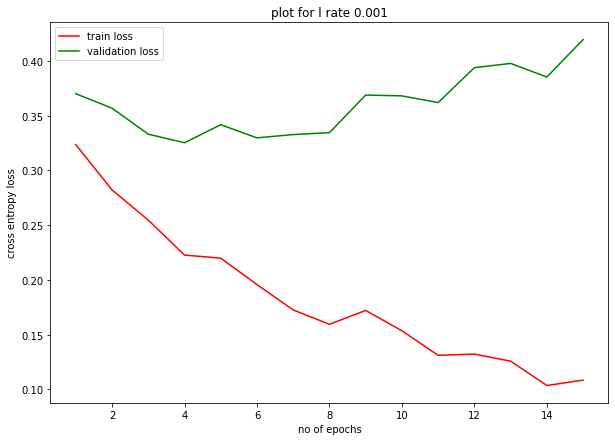

accuracy on test data ->  0.8794
avg loss on training set :  0.18382630521928633
avg loss on validation set :  0.3612694644315519


In [14]:
learning_rate = [0.1, 0.01, 0.001]

for lr in learning_rate:
  MLP = MLPClassifier( hidden_layer_sizes=(256, 32), activation= 'relu', learning_rate_init = lr ,batch_size = 100)
  train_loss = []
  val_loss = []
  epochs = []

  for i in range(15):
    epochs.append(i+1)
    MLP.partial_fit(x_train, y_train, classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    y_pred = MLP.predict_proba(x_train)     # train loss
    loss = cross_entropy_loss(y_pred, y_train)
    train_loss.append(loss)

    y_pred = MLP.predict_proba(x_val)       # val loss
    loss = cross_entropy_loss(y_pred, y_val)
    val_loss.append(loss)

  plt.figure(figsize=(10, 7))
  plt.plot( epochs, train_loss, color = 'r', label = 'train loss')
  plt.plot( epochs, val_loss, color = 'g', label = 'validation loss')
  plt.xlabel('no of epochs')
  plt.ylabel('cross entropy loss')
  plt.title( 'plot for l rate ' + str(lr) )
  plt.legend()
  plt.show()

  y_pred = MLP.predict(x_test)
  print( 'accuracy on test data -> ', accuracy_score(y_pred, y_test))
  print('avg loss on training set : ', mean(train_loss))
  print('avg loss on validation set : ', mean(val_loss))

# **part c)**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


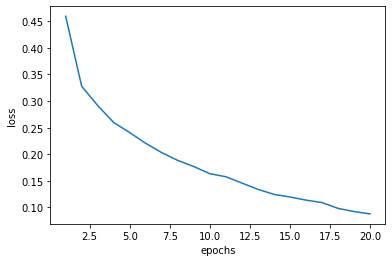

accuracy on test data ->  0.8837
avg loss on training set :  0.1857753968389139


In [15]:
MLP = MLP = MLPClassifier( hidden_layer_sizes=(200, 30), activation= 'relu', learning_rate_init = lr ,batch_size = 100, max_iter = 20)
MLP.fit(x_train, y_train)
plt.plot(np.arange(1,21), MLP.loss_curve_)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

y_pred = MLP.predict(x_test)
print( 'accuracy on test data -> ', accuracy_score(y_pred, y_test))
print('avg loss on training set : ', mean(list(MLP.loss_curve_)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


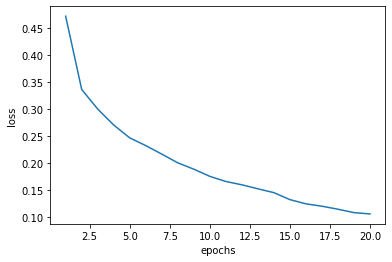

accuracy on test data ->  0.8864
avg loss on training set :  0.19824805042011592


In [16]:
MLP = MLP = MLPClassifier( hidden_layer_sizes=(128, 24), activation= 'relu', learning_rate_init = lr ,batch_size = 100, max_iter = 20)
MLP.fit(x_train, y_train)
plt.plot(np.arange(1,21), MLP.loss_curve_)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

y_pred = MLP.predict(x_test)
print( 'accuracy on test data -> ', accuracy_score(y_pred, y_test))
print('avg loss on training set : ', mean(list(MLP.loss_curve_)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


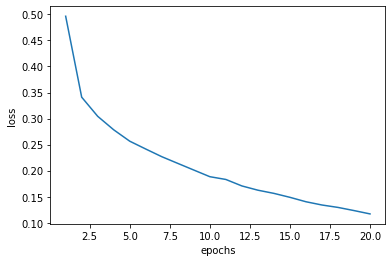

accuracy on test data ->  0.8766
avg loss on training set :  0.2106437601574922


In [17]:
MLP = MLP = MLPClassifier( hidden_layer_sizes=(100, 20), activation= 'relu', learning_rate_init = lr ,batch_size = 100, max_iter = 20)
MLP.fit(x_train, y_train)
plt.plot(np.arange(1,21), MLP.loss_curve_)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

y_pred = MLP.predict(x_test)
print( 'accuracy on test data -> ', accuracy_score(y_pred, y_test))
print('avg loss on training set : ', mean(list(MLP.loss_curve_)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


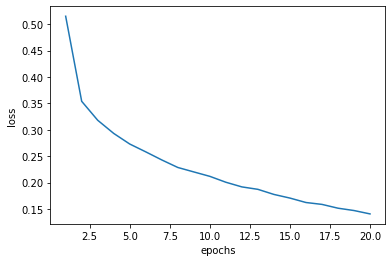

accuracy on test data ->  0.8771
avg loss on training set :  0.23012317925817874


In [18]:
MLP = MLP = MLPClassifier( hidden_layer_sizes=(64, 16), activation= 'relu', learning_rate_init = lr ,batch_size = 100, max_iter = 20)
MLP.fit(x_train, y_train)
plt.plot(np.arange(1,21), MLP.loss_curve_)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

y_pred = MLP.predict(x_test)
print( 'accuracy on test data -> ', accuracy_score(y_pred, y_test))
print('avg loss on training set : ', mean(list(MLP.loss_curve_)))

# **pard d)**

In [19]:
search_space = {
    "learning_rate_init" : [0.1, 0.01, 0.001],
    "activation" : ['logistic', 'relu', 'tanh', 'identity'],
    # "max_iter" : [10, 15, 20],
    "batch_size" : [100, 200]

}

In [20]:
MLP = MLPClassifier()

In [21]:
GS = GridSearchCV(estimator = MLP,
                  param_grid = search_space,
                  # scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  # refit = "r2",
                  cv = 4, verbose = 4)


In [22]:
GS.fit(x_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END activation=logistic, learning_rate_init=0.1;, score=0.783 total time=  22.2s
[CV 2/4] END activation=logistic, learning_rate_init=0.1;, score=0.784 total time=  23.4s
[CV 3/4] END activation=logistic, learning_rate_init=0.1;, score=0.792 total time=  20.5s
[CV 4/4] END activation=logistic, learning_rate_init=0.1;, score=0.752 total time=  25.1s
[CV 1/4] END activation=logistic, learning_rate_init=0.01;, score=0.867 total time= 2.4min
[CV 2/4] END activation=logistic, learning_rate_init=0.01;, score=0.862 total time= 2.2min
[CV 3/4] END activation=logistic, learning_rate_init=0.01;, score=0.859 total time= 3.0min
[CV 4/4] END activation=logistic, learning_rate_init=0.01;, score=0.869 total time= 3.5min
[CV 1/4] END activation=logistic, learning_rate_init=0.001;, score=0.885 total time= 3.6min
[CV 2/4] END activation=logistic, learning_rate_init=0.001;, score=0.877 total time= 3.5min
[CV 3/4] END activation=logisti

GridSearchCV(cv=4, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu', 'tanh', 'identity'],
                         'learning_rate_init': [0.1, 0.01, 0.001]},
             verbose=4)

In [23]:
print(GS.best_estimator_)
print(GS.best_score_)

MLPClassifier()
0.8832156862745097


In [24]:
print(GS.best_params_) 

{'activation': 'relu', 'learning_rate_init': 0.001}


In [25]:
GS.best_estimator_

MLPClassifier()

In [26]:
import numpy as np
xx = np.array( [ [ 11,10,3 ] ])
print(xx, xx.shape)

[[11 10  3]] (1, 3)


In [27]:
np.tanh(xx)

array([[1.        , 1.        , 0.99505475]])

In [28]:
1 / (1 + np.exp(-xx))

array([[0.9999833 , 0.9999546 , 0.95257413]])

In [29]:
np.array(xx>0).astype('int')

array([[1, 1, 1]])

In [30]:
np.argmax(xx)

0